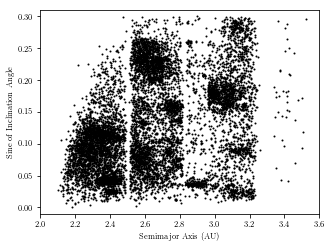

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
from astroML.datasets import fetch_moving_objects

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch the moving object data
data = fetch_moving_objects(Parker2008_cuts=True)

# Use only the first 10000 points
data = data[:10000]

a = data['aprime']
sini = data['sin_iprime']

#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(a, sini, '.', markersize=2, color='black')

ax.set_xlim(2.0, 3.6)
ax.set_ylim(-0.01, 0.31)

ax.set_xlabel('Semimajor Axis (AU)')
ax.set_ylabel('Sine of Inclination Angle')

plt.show()


/Users/juan/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


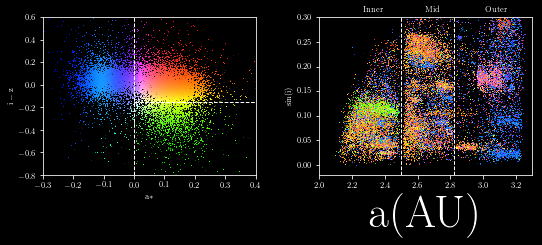

In [6]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_moving_objects
from astroML.plotting.tools import devectorize_axes

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def black_bg_subplot(*args, **kwargs):
    """Create a subplot with black background"""
    kwargs['axisbg'] = 'k'
    ax = plt.subplot(*args, **kwargs)

    # set ticks and labels to white
    for spine in ax.spines.values():
        spine.set_color('w')

    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        for child in tick.get_children():
            child.set_color('w')

    return ax


def compute_color(mag_a, mag_i, mag_z, a_crit=-0.1):
    """
    Compute the scatter-plot color using code adapted from
    TCL source used in Parker 2008.
    """
    # define the base color scalings
    R = np.ones_like(mag_i)
    G = 0.5 * 10 ** (-2 * (mag_i - mag_z - 0.01))
    B = 1.5 * 10 ** (-8 * (mag_a + 0.0))

    # enhance green beyond the a_crit cutoff
    G += 10. / (1 + np.exp((mag_a - a_crit) / 0.02))

    # normalize color of each point to its maximum component
    RGB = np.vstack([R, G, B])
    RGB /= RGB.max(0)

    # return an array of RGB colors, which is shape (n_points, 3)
    return RGB.T


#------------------------------------------------------------
# Fetch data and extract the desired quantities
data = fetch_moving_objects(Parker2008_cuts=True)
mag_a = data['mag_a']
mag_i = data['mag_i']
mag_z = data['mag_z']
a = data['aprime']
sini = data['sin_iprime']

# dither: magnitudes are recorded only to +/- 0.01
mag_a += -0.005 + 0.01 * np.random.random(size=mag_a.shape)
mag_i += -0.005 + 0.01 * np.random.random(size=mag_i.shape)
mag_z += -0.005 + 0.01 * np.random.random(size=mag_z.shape)

# compute RGB color based on magnitudes
color = compute_color(mag_a, mag_i, mag_z)

#------------------------------------------------------------
# set up the plot
fig = plt.figure(figsize=(8, 3), facecolor='k')
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.3,
                    bottom=0.2, top=0.93)

# plot the color-magnitude plot
ax = black_bg_subplot(121)
ax.scatter(mag_a, mag_i - mag_z,
           c=color, s=0.5, lw=0)
devectorize_axes(ax, dpi=400)

ax.plot([0, 0], [-0.8, 0.6], '--w', lw=1)
ax.plot([0, 0.4], [-0.15, -0.15], '--w', lw=1)

ax.set_xlim(-0.3, 0.4)
ax.set_ylim(-0.8, 0.6)

ax.set_xlabel(r'${\rm a*}$', color='w')
ax.set_ylabel(r'${\rm i-z}$', color='w')

# plot the orbital parameters plot
ax = black_bg_subplot(122)
ax.scatter(a, sini,
           c=color, s=0.5, lw=0, edgecolor='none')
devectorize_axes(ax, dpi=400)

ax.plot([2.5, 2.5], [-0.02, 0.3], '--w', lw=1)
ax.plot([2.82, 2.82], [-0.02, 0.3], '--w', lw=1)

ax.set_xlim(2.0, 3.3)
ax.set_ylim(-0.02, 0.3)

ax.set_xlabel(r'${\rm a (AU)}$', color='w', fontsize=45)
ax.set_ylabel(r'${\rm sin(i)}$', color='w')

# label the plot
text_kwargs = dict(color='w', transform=plt.gca().transAxes,
                   ha='center', va='bottom')

ax.text(0.25, 1.02, 'Inner', **text_kwargs)
ax.text(0.53, 1.02, 'Mid', **text_kwargs)
ax.text(0.83, 1.02, 'Outer', **text_kwargs)

# Saving the black-background figure requires some extra arguments:
#fig.savefig('moving_objects.png',
#            facecolor='black',
#            edgecolor='none')

plt.show()
